# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [48]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [115]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [116]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [117]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


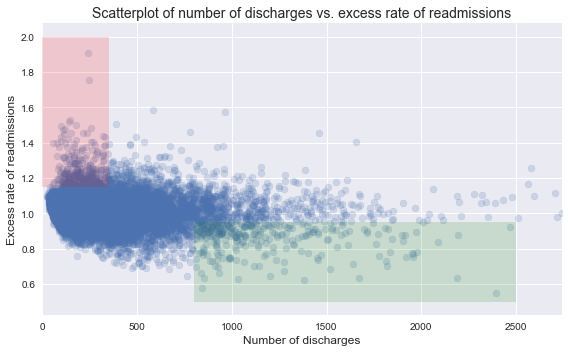

In [118]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

The conclusions are done just by relying on sparse part of the sacatter plot. We might consider those data, that are determined by color boxes, as outliers. We'd better to plot the above figure using joitplot instead with a fitted regression line. Despite the slope of the regression line is negative, however the pearson correlation cofficient is a very low value < 0.1. The figure also shows the distribution of the features, Exess Readmission Ratio and Number of Discharges. For example, we can see that both variables have gaussian-like distribution unless Number of Discharges has left skew in its histogram. 

In [119]:
clean_hospital_read_df.rename(columns={'Excess Readmission Ratio':'Excess_Readmission_Ratio'}, inplace=True)
clean_hospital_read_df.rename(columns={'Number of Discharges':'Number_of_Discharges'}, inplace=True)

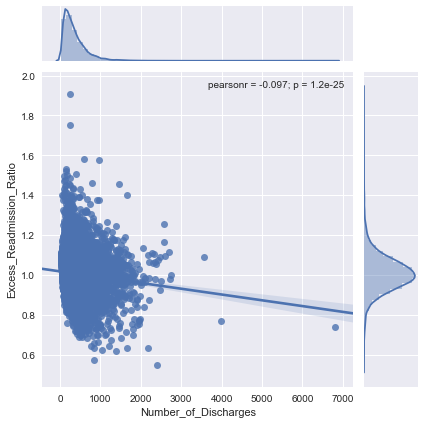

In [120]:
sns.jointplot(x='Number_of_Discharges', y='Excess_Readmission_Ratio', 
              data=clean_hospital_read_df, kind='reg')

First of all I split the dataset into 3 different parts based on Number of Discharges:

- Group A: Data with Number of Discharges lower than 100

- Group B: Data with Number of Discharges between 100 and 1000

- Group C: Data with Number of Discharges greater than 1000

I added a new column to determine the type of each data based on the above definition.

From the plots below we can see a very minor difference between Groups B and C. However, Group A has a significant difference in its Standard deviation to others. We'd better to hold a Hypothesis testing that for the cases such this the ANOVA test must be used.

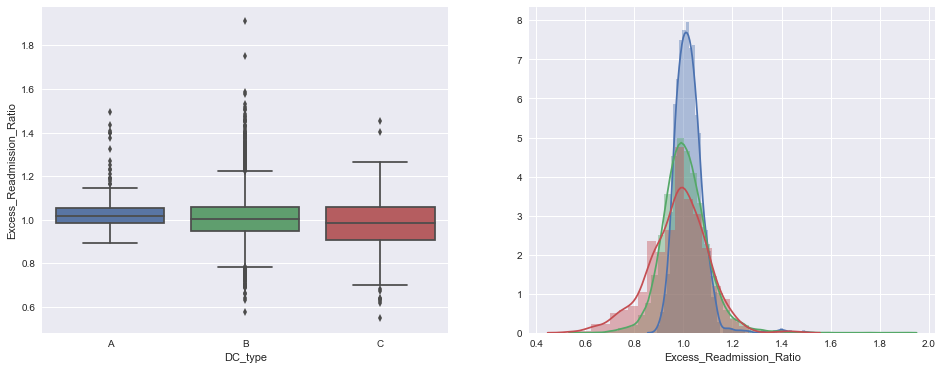

In [121]:
clean_hospital_read_df['DC_type'] = 'B'
clean_hospital_read_df.ix[clean_hospital_read_df['Number_of_Discharges'] < 100, 'DC_type'] = 'A'
clean_hospital_read_df.ix[clean_hospital_read_df['Number_of_Discharges'] > 1000, 'DC_type'] = 'C'

fig, ax = plt.subplots(1,2,figsize=[16,6])
sns.boxplot(clean_hospital_read_df['DC_type'], clean_hospital_read_df['Excess_Readmission_Ratio'], ax=ax[0])

sns.distplot(clean_hospital_read_df.ix[clean_hospital_read_df['DC_type']=='A', 'Excess_Readmission_Ratio'].dropna(), ax=ax[1])
sns.distplot(clean_hospital_read_df.ix[clean_hospital_read_df['DC_type']=='B', 'Excess_Readmission_Ratio'].dropna(), ax=ax[1])
sns.distplot(clean_hospital_read_df.ix[clean_hospital_read_df['DC_type']=='C', 'Excess_Readmission_Ratio'].dropna(), ax=ax[1])

### ANOVA test

The mull-hypothesis is that, there is no significant differences between the mean of the three groups dfined above.

$H_0: \mu_A = \mu_B = \mu_C$

To calculate the ANOVA F-statistic and the associated p-value, I prefer to use Ordinary Least Square (OLS) function, part of statsmodel API package. OLS is powerful method used in Regression modeling, however I use the modeling approach in the context of ANOVA [1].

From the query generated below, we can see that, the F-statistic is 39.72 and the associated p-value is near 0. This is also the same as we get from one-way F-test using scipy. Therefore, the above null-hypothesis is rejeced, that means there is significant difference between these 3 groups. However, we don't know how much is it, and which ones are significantly different. This is what we must find out by Post-Hoc.

In [122]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


model = ols(formula='Excess_Readmission_Ratio ~ C(DC_type)', data=clean_hospital_read_df)
result = model.fit()
print result.summary()

                               OLS Regression Results                               
Dep. Variable:     Excess_Readmission_Ratio   R-squared:                       0.007
Model:                                  OLS   Adj. R-squared:                  0.007
Method:                       Least Squares   F-statistic:                     39.72
Date:                      Wed, 26 Jul 2017   Prob (F-statistic):           6.46e-18
Time:                              16:36:12   Log-Likelihood:                 11162.
No. Observations:                     11497   AIC:                        -2.232e+04
Df Residuals:                         11494   BIC:                        -2.230e+04
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------

In [123]:
df1 = clean_hospital_read_df[clean_hospital_read_df['DC_type']=='A']['Excess_Readmission_Ratio'].dropna()
df2 = clean_hospital_read_df[clean_hospital_read_df['DC_type']=='B']['Excess_Readmission_Ratio'].dropna()
df3 = clean_hospital_read_df[clean_hospital_read_df['DC_type']=='C']['Excess_Readmission_Ratio'].dropna()
scp.stats.f_oneway(df1, df2, df3)

F_onewayResult(statistic=39.7179578928315, pvalue=6.4571730803688161e-18)

### POST-HOC test

The POS-HOC test conducts post hoc paired comparison. There are a lot ways to apply Post-Hoc test for different conditions, however in most of the cases it's less important to use each of one. By he way here I use the Tukey's Honest Significance Difference test.

In [133]:
import statsmodels.stats.multicomp as multi

df = clean_hospital_read_df[['Excess_Readmission_Ratio', 'DC_type']]
df = df.dropna()
mc = multi.MultiComparison(df['Excess_Readmission_Ratio'], df['DC_type'])
mc_result = mc.tukeyhsd()
print mc_result.summary()

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  A      B    -0.0156  -0.0222  -0.009  True 
  A      C    -0.0443  -0.0561 -0.0325  True 
  B      C    -0.0287  -0.0389 -0.0185  True 
---------------------------------------------


## Refrences

[1] https://www.coursera.org/learn/data-analysis-tools/lecture/ElVbC/python-lesson-7-anova-explanatory-variables-with-two-levels

[2] https://www.coursera.org/learn/data-analysis-tools/lecture/uMNjz/python-lesson-9-post-hoc-tests-for-anova